In [1]:
from pydantic import BaseModel, PositiveFloat
import numpy as np
import matplotlib.pyplot as plt

In [2]:
class Parametros(BaseModel):
    valor_central: float
    desviacion_estandar: PositiveFloat
    ruido: PositiveFloat
    n_datos: int

In [12]:
class ModeloJuguete:
    def __init__(self, parametros: Parametros):
        self.parametros = parametros

    def generar_datos(self) -> np.ndarray:
        datos = np.random.normal(loc=self.parametros.valor_central, scale=self.parametros.desviacion_estandar, size=self.parametros.n_datos)
        datos += np.random.normal(scale=self.parametros.ruido, size=self.parametros.n_datos)
        return datos

    def prediccion_teorica(self) -> float:
        return self.parametros.valor_central + self.parametros.desviacion_estandar * 2

In [13]:
parametros = Parametros(valor_central=10, desviacion_estandar=1, ruido=0.5, n_datos=50)
modelo = ModeloJuguete(parametros)

In [14]:
observaciones = modelo.generar_datos()

# Predicción teórica
predicciones = [modelo.prediccion_teorica() for _ in range(parametros.n_datos)]

# Calcular el costo
errores = np.ones_like(observaciones) * parametros.desviacion_estandar
selim_ecuation = (predicciones + observaciones) / errores

# Verificar si se cumple la condición
if np.all(costos < 1):
    print("¡Condición cumplida!")
else:
    print("¡La condición no se cumple!")

¡La condición no se cumple!


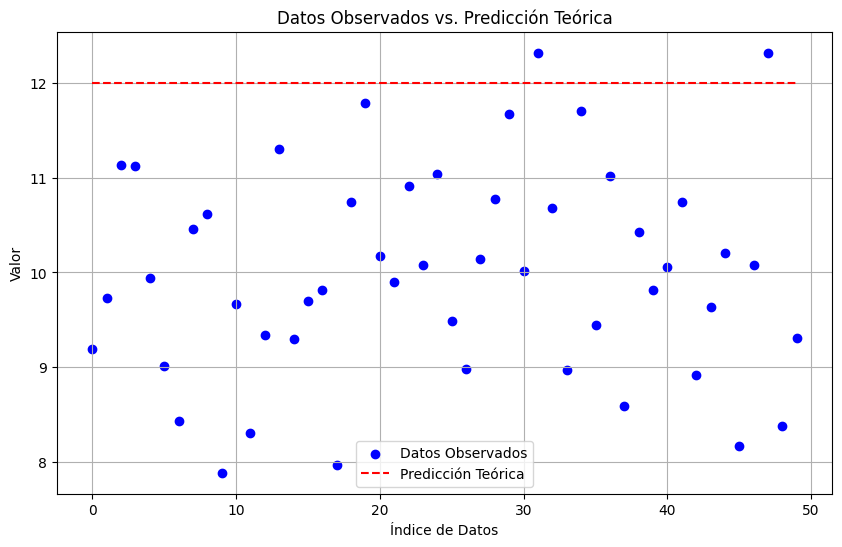

In [15]:
plt.figure(figsize=(10, 6))
plt.scatter(range(len(observaciones)), observaciones, color='blue', label='Datos Observados')
plt.plot(range(len(predicciones)), predicciones, color='red', linestyle='--', label='Predicción Teórica')
plt.xlabel('Índice de Datos')
plt.ylabel('Valor')
plt.title('Datos Observados vs. Predicción Teórica')
plt.legend()
plt.grid(True)
plt.show()

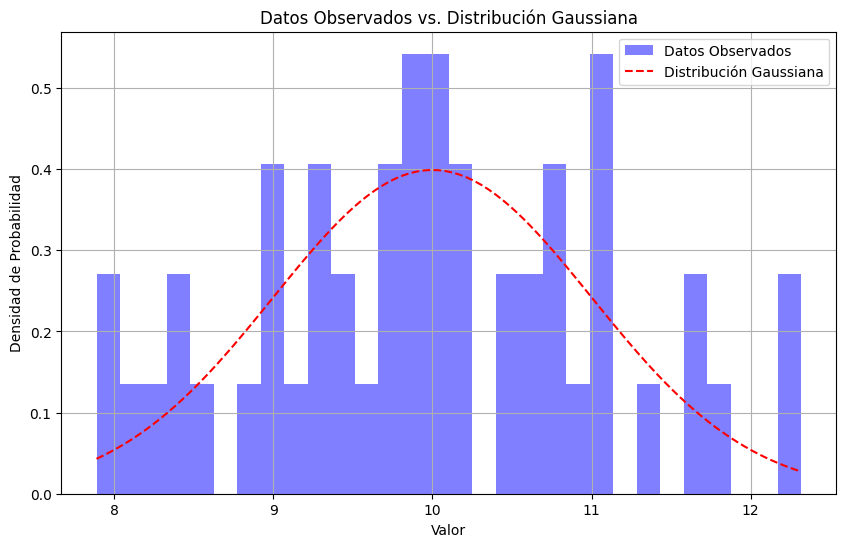

In [18]:
plt.figure(figsize=(10, 6))
plt.hist(observaciones, bins=30, color='blue', alpha=0.5, label='Datos Observados', density=True)
plt.plot(np.linspace(min(observaciones), max(observaciones), 100), 
         1/(parametros.desviacion_estandar * np.sqrt(2 * np.pi)) * 
         np.exp( - (np.linspace(min(observaciones), max(observaciones), 100) - parametros.valor_central)**2 / (2 * parametros.desviacion_estandar**2) ), 
         color='red', linestyle='--', label='Distribución Gaussiana')
plt.xlabel('Valor')
plt.ylabel('Densidad de Probabilidad')
plt.title('Datos Observados vs. Distribución Gaussiana')
plt.legend()
plt.grid(True)
plt.show()